# Análise de Produtos de renda fixa

## Resumo

### RESGATE
        - 99% dos fundos tem resgate diário

### FAMILIA
        - A maior parte dos fundos são de renda fixa, cerca de 50% a mais
        - Todos os fundos de renda variavél tem o risco ativo 5
        - A maior parte dos fundos de renda fixa tem risco ativo de 4
        - Apenas 1 fundo tem risco ativo 0
        - Todos os fundos com valor mínimo de aplicação de 30RS estão em renda fixa

### RISCO
        - O risco predominante é 5, seguido de 4 e 3
        - risco 3 é onde tem mais fundos com valor mínimo de 3k (proporcionalmente)

### APLICAÇÃO MÍNIMA
        - 5k é a aplicação mais comum, seguido de 1k e 10k
        - Existem um número consideravél com valores iniciais menores que 500

### VALOR DE PERMANENCIA
        - A maior parte dos fundoes tem um mínimo de 1k ou 5k como valor de permanência

### DIAS UTEIS PARA RESGATE
        - A maior parte dos fundos liberam o resgate em 32, 31 e 1 dias, respectivamente

### RENDIMENTO ANUAL
        - Varia bastante, porém a maior parte dos fundos tem uma média de 1.5M por ano com um SD de 2.6M


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

In [2]:
df_01 = pd.read_csv("data/Dataset-3.csv")

In [3]:
df_01.columns

Index(['Unnamed: 0', 'AdministradorFundo__c', 'AtivoDisponivel__c',
       'Carencia__c', 'CarteiraCNPJ__c', 'CNPJAdministrador__c',
       'DataDeVencimento__c', 'DescontoIR__c', 'DescricaoAtivo__c',
       'DescricaoCarencia__c', 'DescricaoClasse__c',
       'DescricaoCotizacaoAplicacao__c', 'DescricaoCotizacaoResgate__c',
       'DescricaoEmissor__c', 'DescricaoIndexador__c',
       'DescricaoIndiceBenchmark__c', 'DescricaoLiquidacaoAplicacao__c',
       'DescricaoLiquidacaoResgate__c', 'DescricaoProduto__c',
       'DescricaoTaxaPerformance__c', 'DescricaoTributacaoProduto__c',
       'DescricaoTributacao__c', 'DiasUteisParaResgate__c',
       'DiasVencimento__c', 'FamiliaCarteira__c', 'FiltroValorMinimo__c',
       'GestorFundo__c', 'ProdutoId', 'Inativo__c', 'LucroMesAnterior__c',
       'NDiasCotizacaoAplicacao__c', 'NomeAdministrador__c', 'NomeCompleto__c',
       'NomeEmissor__c', 'NomeIndexador__c', 'NomeInvestimento__c',
       'NomeProduto__c', 'Nome__c', 'NrDiasUteisCotiza

In [118]:
del df_01['Unnamed: 0']
df_01.shape

(8603, 85)

In [16]:
cols = ['ProdutoId', 'NomeInvestimento__c','DescricaoCarencia__c', 'DescricaoCotizacaoResgate__c', 'DescricaoCotizacaoResgate__c', 'DescricaoTributacaoProduto__c',
        'DiasUteisParaResgate__c', 'FamiliaCarteira__c', 'FiltroValorMinimo__c', 'RentabilidadeAno__c', 'ResgateDias__c',
        'RiscoAtivo__c', 'SaldoMinimoPermanencia__c', 'Inativo__c']

# ------------------------------------------------------

# Data Wrangling

# ------------------------------------------------------

In [18]:
df_produtos = df_01[cols]

In [19]:
df_produtos.drop_duplicates(inplace=True, subset=['ProdutoId'])

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_produtos = df_produtos[df_produtos['Inativo__c'] == False]

In [21]:
df_fundos = df_produtos[~df_produtos['NomeInvestimento__c'].isin(['CDB', 'LCI', 'LCA', 'LC'])]

In [23]:
print(f"Produtos únicos: {df_fundos.shape[0]}\n\n")
print(f"coluna Id:\n{df_fundos['ProdutoId'].describe()}\n\n")

Produtos únicos: 286


coluna Id:
count                    286
unique                   286
top       a0W3u00000AdMqnEAF
freq                       1
Name: ProdutoId, dtype: object




In [24]:
df_fundos.head()

,ProdutoId,NomeInvestimento__c,DescricaoCarencia__c,DescricaoCotizacaoResgate__c,DescricaoCotizacaoResgate__c,DescricaoTributacaoProduto__c,DiasUteisParaResgate__c,FamiliaCarteira__c,FiltroValorMinimo__c,RentabilidadeAno__c,ResgateDias__c,RiscoAtivo__c,SaldoMinimoPermanencia__c,Inativo__c
38,a0W3u000009PBevEAG,EQUITAS SELECTION MÃO AMIGA FIC AÇÕES,Qualquer dia,30 dias corridos,30 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",32 dias,Renda Variável,5000.0,4.001300,Qualquer dia,5.0,1000.0,False
40,a0W3u000009PBfAEAW,EQUITAS SELECTION FIC FIA,Qualquer dia,30 dias corridos,30 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",32 dias,Renda Variável,5000.0,1.334016,Qualquer dia,5.0,1000.0,False
71,a0W3u000009PBlwEAG,TRIGONO FLAGSHIP SMALL CAPS FIC FIA,Qualquer dia,30 dias corridos,30 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",32 dias,Renda Variável,500.0,11.323087,Qualquer dia,5.0,500.0,False
72,a0W3u000009PBm6EAG,TRIGONO VERBIER FIA,Qualquer dia,30 dias corridos,30 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",32 dias,Renda Variável,500.0,8.178073,Qualquer dia,5.0,500.0,False
267,a0W3u000009PCgiEAG,SQUADRA LONG-BIASED FIC FIA,Qualquer dia,60 dias corridos,60 dias corridos,"Incidirá no momento do resgate, à alíquota de ...",62 dias,Renda Variável,5000.0,6.945695,Qualquer dia,5.0,5000.0,False


## Exploração dos dados

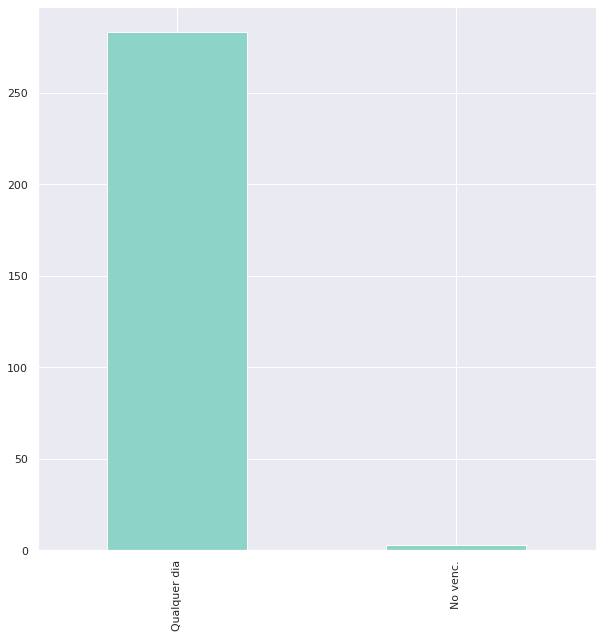

In [25]:
plt.figure(figsize=(10,10))
df_fundos['ResgateDias__c'].value_counts().plot(kind='bar')

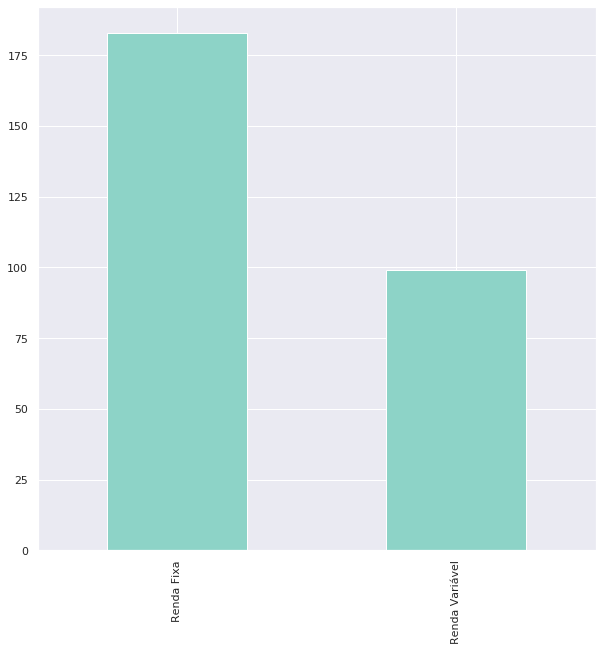

In [26]:
plt.figure(figsize=(10,10))
df_fundos['FamiliaCarteira__c'].value_counts().plot(kind='bar')

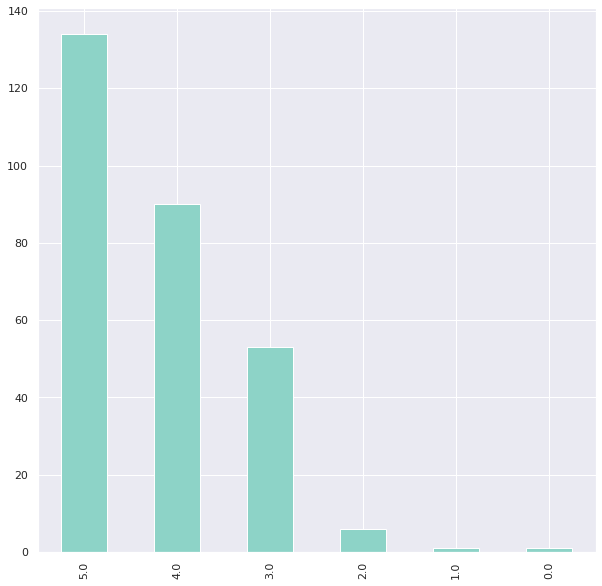

In [27]:
plt.figure(figsize=(10,10))
df_fundos['RiscoAtivo__c'].value_counts().plot(kind='bar')

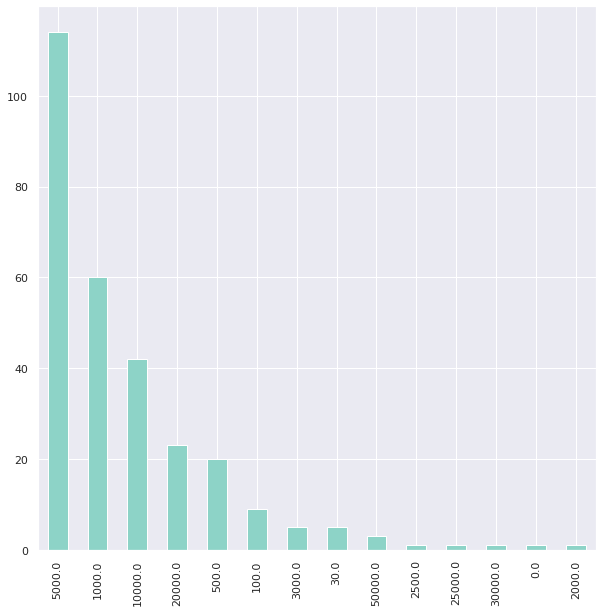

In [28]:
plt.figure(figsize=(10, 10))
df_fundos['FiltroValorMinimo__c'].value_counts().plot(kind='bar')

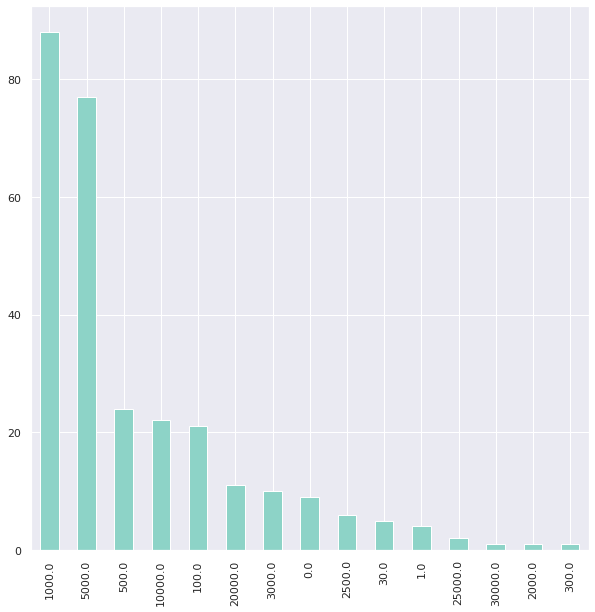

In [29]:
plt.figure(figsize=(10, 10))
df_fundos['SaldoMinimoPermanencia__c'].value_counts().plot(kind='bar')

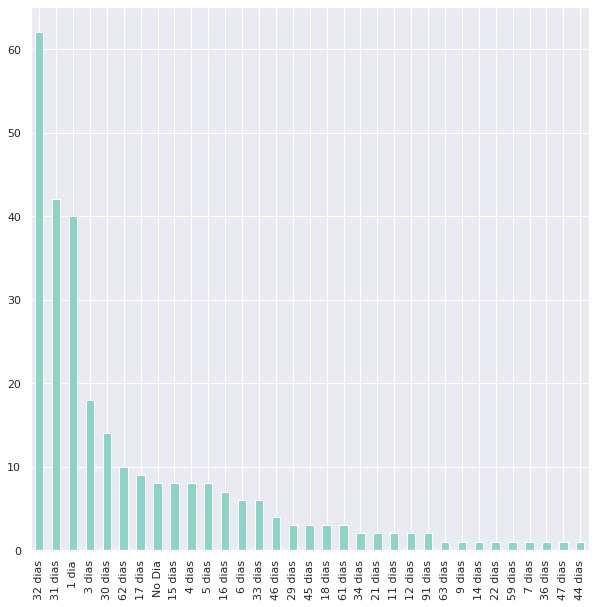

In [31]:
plt.figure(figsize=(10, 10))
df_fundos['DiasUteisParaResgate__c'].value_counts().plot(kind='bar')

In [50]:
df_fundos.query('RentabilidadeAno__c < 300')['RentabilidadeAno__c'].describe()

count    281.000000
mean       1.544707
std        2.635866
min      -17.881317
25%        0.384280
50%        0.645571
75%        2.828045
max       11.323087
Name: RentabilidadeAno__c, dtype: float64

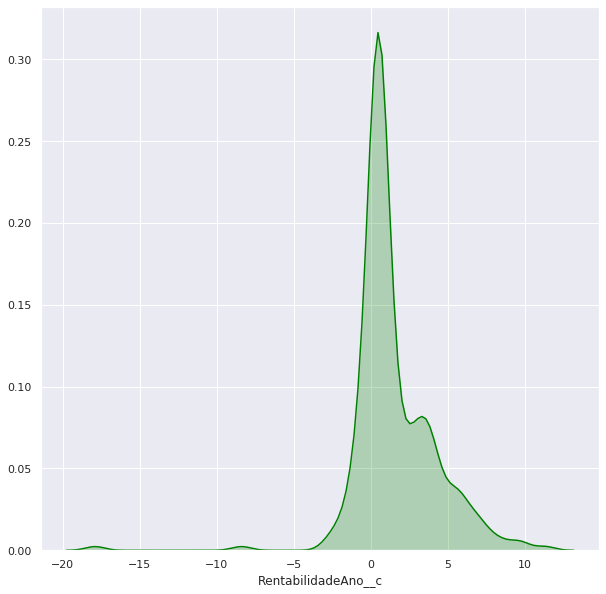

In [49]:
plt.figure(figsize=(10, 10))
sns.distplot(df_fundos.query('RentabilidadeAno__c < 300')['RentabilidadeAno__c'], hist=False, color="g", kde_kws={"shade": True})

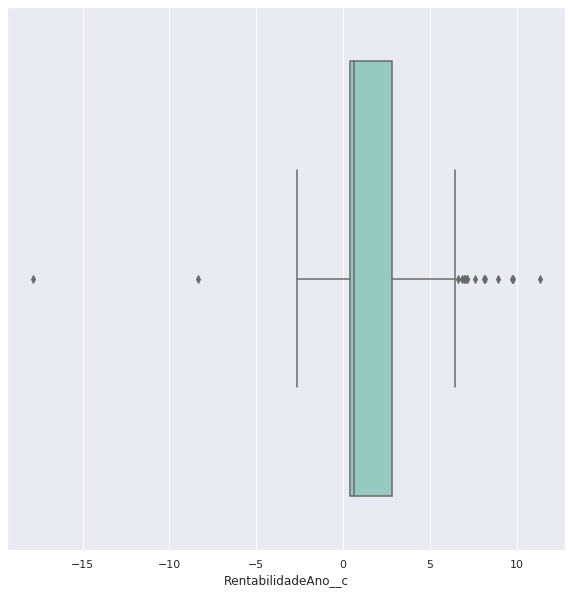

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot(df_fundos.query('RentabilidadeAno__c < 300')['RentabilidadeAno__c'])

## Exploração Bivariada

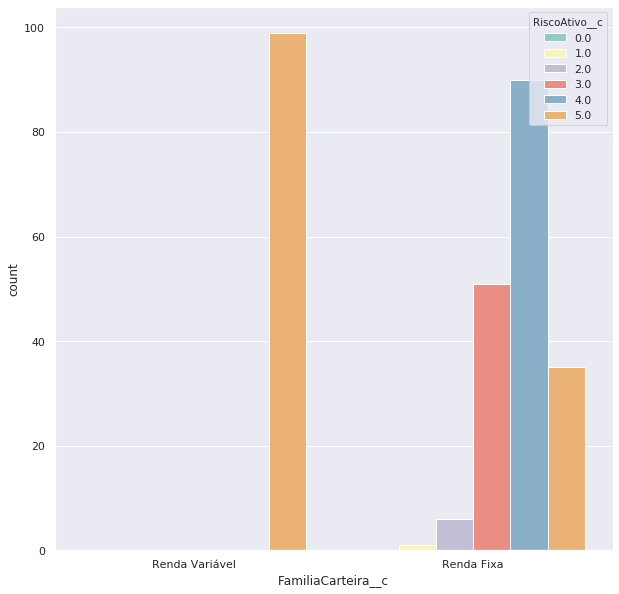

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(x='FamiliaCarteira__c', hue="RiscoAtivo__c", data=df_fundos)

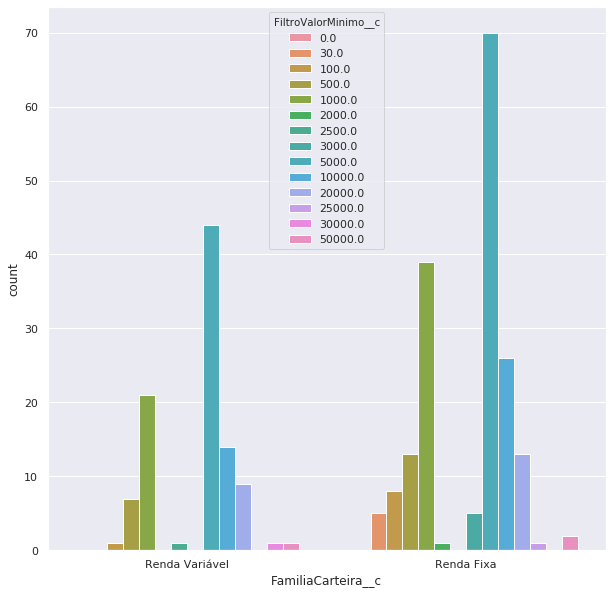

In [54]:
plt.figure(figsize=(10,10))
sns.countplot(x='FamiliaCarteira__c', hue="FiltroValorMinimo__c", data=df_fundos)

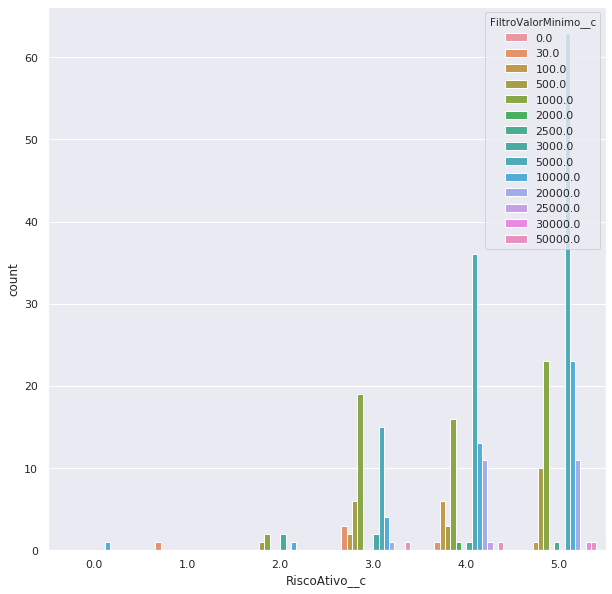

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(x='RiscoAtivo__c', hue="FiltroValorMinimo__c", data=df_fundos)

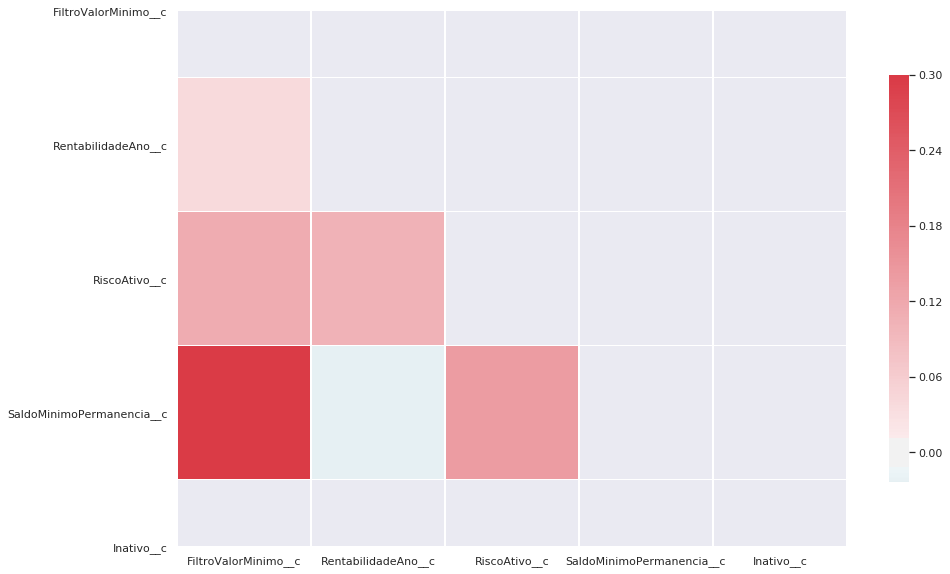

In [83]:
plt.figure(figsize=(15,15))
corr = df_fundos.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [84]:
df_fundos.to_csv('data/processados/produtos_fundos.csv', index= False)